<a href="https://colab.research.google.com/github/ConradBitt/imersao_dados_3ed/blob/main/Notebook_Imers%C3%A3o_Dados_3%C2%AA_ED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Pandas e para um problema de farmácologia

## Resumo
Neste tópico iremos utilizar o python junto com o módulo [Pandas](pandas.pydata.org/), [Matplotlib](matplotlib.org/) e [Seaborn](seaborn.pydata.org/), para analisar alguns dados referêntes a experimentos em biologia molecular. Explorando quais os tipos das variaveis, o que é tratamento com droga e controle, quais substancias mais ministradas e por fim renomeando algumas variaveis para facilitar a manipulação dos dados.



## Importações

In [1]:
import pandas as pd 
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib as mpl

sns.set_context('talk')

## Obtendo dados 

In [2]:
uri_experimentos = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
uri_resultados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true'

In [3]:
experimentos = pd.read_csv(uri_experimentos,
                           compression='zip')


## Exploração 

Aqui temos os dados referentes à um experimento em genética

In [4]:
display(experimentos.tail())
display(experimentos.shape)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


(23814, 877)

Aparentemente são dados experimentais de teste de algumas drogas/farmacos/compostos, nas colunas temos as variáveis e linhas amostras.

Temos um total de 23814 amostras, cada uma com 877 variáveis. Podemos analisar que tipo de dado apresenta cada variável com o método ``info()``

### Tipos de variáveis

In [5]:
experimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB



#### Cometario sobre os tipos de variáveis
> Temos dados do tipo float64 (872 variávei), int64(uma variável), object (quatro variáveis).

---



### Sobre categorias de tratamento

É possivel notar a presença de uma variável chamada ``tratamento`` indica se aquela amostra pertence ao grupo ``com_controle`` ou ao grupo ``com_droga``. Em pesquisas é extremamente comum ter estes dois grupos de amostras quando se quer testar exclusivamente determinados compostos, dado que as amostras estão submetidas à mesmas condições, se ministra um tratamento num grupo de controle e em outro grupo com a droga, assim é possível comparar se alterações ocorreram apenas sob influencia do fármaco ou não.


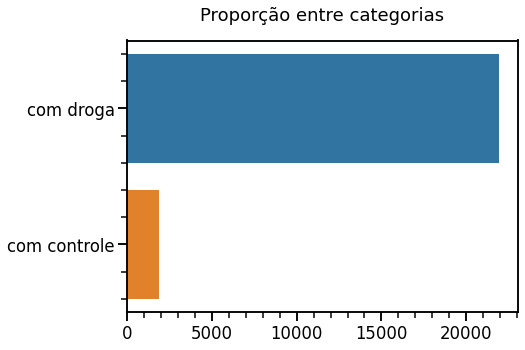

Tabela em (%) de amostras em cada tratamento: 



,Amostras (%)
tratamento,
com_droga,92.164273
com_controle,7.835727


In [6]:
tratamentos = experimentos.tratamento.value_counts()

ax = sns.barplot(y=tratamentos.index, x=tratamentos.values)
ax.figure.set_size_inches(7,5)

ax.set_title('Proporção entre categorias', pad=20)
ax.set_yticklabels([categoria.replace('_', ' ') for categoria in tratamentos.index])

plt.minorticks_on()
plt.show()

print('Tabela em (%) de amostras em cada tratamento: \n')
tratamentos = (experimentos.tratamento.value_counts(normalize=True) * 100).to_frame()
tratamentos.columns = ['Amostras (%)']
tratamentos = tratamentos.rename_axis('tratamento')
display(tratamentos)

#### Comentário sobre categorias de tratamento 
> Acima vemos quantas amostras pertencem a cada grupo. É possível perceber que a proporção entre os dados não é a mesma, mais de 92% as amostras pertence ao grupo de amostras ``com_droga`` e apenas 7% pertence ao grupo ``com_controle``. **Uma hipótese que é razoável propor é que neste conjunto de experimentos se testava varios compostos ao mesmo tempo dado um mesmo grupo de controle.**

---

### Analisando a variável tempo

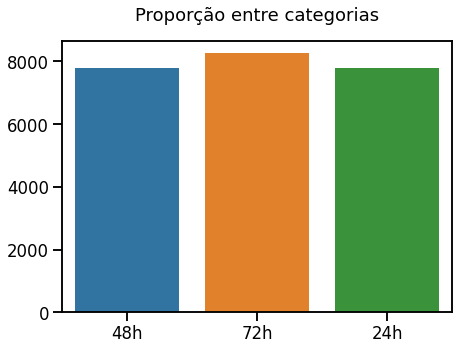

Tabela em (%) das amostras no tempo referente: 



,Amostras (%)
Tempo,
48,34.643487
72,32.720249
24,32.636264


In [7]:
tempos_das_amostras = experimentos.tempo.value_counts()

ax = sns.barplot(x=tempos_das_amostras.index, y=tempos_das_amostras.values)
ax.set_title('Proporção entre categorias', pad=20)
ax.figure.set_size_inches(7,5)
ax.set_xticklabels([str(tempo) + 'h' for tempo in tempos_das_amostras.index])
plt.show()

print('Tabela em (%) das amostras no tempo referente: \n')
tempos_das_amostras = (experimentos.tempo.value_counts(normalize=True) * 100).to_frame()
tempos_das_amostras.columns = ['Amostras (%)']
tempos_das_amostras = tempos_das_amostras.rename_axis('Tempo')
tempos_das_amostras

#### Comentário sobre a categoria tempo
> Podemos verificar que as categorias são $48$, $72$ e $24$, possivelmente expresso em horas. A proporção dos dados nas categorias é bem homogênea.

---

### Drogas ministradas

Dentro dos experimentos temos uma variável chamada ``droga``, nela estão os tipos de drogas ministradas em cada amostra. Esta variável esta anonimizada justamente para que o composto aplicado não seja enviesado por quem pesquisa e analisa os dados. Mas podemos investigar quais tipos de drogas foram ministradas.

,droga
87d714366,718
9f80f3f77,246
8b87a7a83,203
5628cb3ee,202
d08af5d4b,196
...,...
a67f38a69,1
b2fe3eca7,1
98c4c858e,1
4055d26a8,1


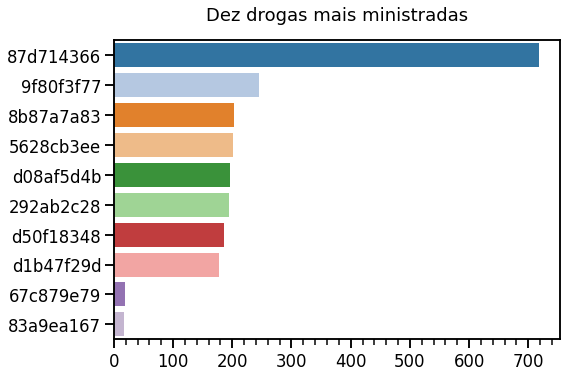

In [8]:
drogas_ministradas = experimentos.query('tratamento == "com_droga"')['droga'].value_counts()
display(drogas_ministradas.to_frame())


dez_drogas_mais_ministrada = drogas_ministradas[:10]

ax = sns.barplot(x=dez_drogas_mais_ministrada.values,
                 y=dez_drogas_mais_ministrada.index, palette='tab20')
ax.figure.set_size_inches(8,5.5)
ax.set_title('Dez drogas mais ministradas', pad=20)
ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.show()


#### Comentario sobre quantos tipos de drogas foram ministradas

> Dentre as amostras classificadas como "com_droga" foram ministradas 3288 substancias diferentes no experimento. É possível notar que muitas drogas foram aplicadas em apenas uma amostra. Dado que algumas drogas tem uma baixa amostragem vou exibir as 10 substancias mais frequentes.






### Medidas de tendencia central, dispersão e intervalo das variáveis
Outro ponto importante de se dar uma breve olhada é nas medidas de tendência central, dispersão e intervalos interquartis, podemos fazer isso através do método `describe()`:

In [9]:
experimentos.describe().T

,count,mean,std,min,25%,50%,75%,max
tempo,23814.0,48.020156,19.402807,24.000,24.000000,48.00000,72.000000,72.000
g-0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g-1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g-2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g-3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
...,...,...,...,...,...,...,...,...
c-95,23814.0,-0.353726,1.629291,-10.000,-0.567975,-0.01025,0.444750,2.814
c-96,23814.0,-0.463485,2.059725,-10.000,-0.552575,-0.00125,0.465225,3.505
c-97,23814.0,-0.378241,1.703615,-10.000,-0.561000,-0.00680,0.446400,2.924
c-98,23814.0,-0.470252,1.834828,-10.000,-0.592600,0.01400,0.461275,3.111


#### Comentário sobre tendências centrais e dispersão

> Com uma breve visualização da tabela acima podemos verificar a quantidade de amostras na coluna ``count``. Além disso temos a media (`mean`), desvio padrão amostral (`std`), os valores mínimo (`min`) / máximo (`max`) e os quartis 25%, 50% e 75%.

> Note que para cada variável as médias e desvio são diferentes, e portanto, esses dados têm distribuições diferentes. Outro ponto é que os valores minimos e máximo são diferentes também para cada variável.

---

## Expressão gênica

Expressão gênica é um assunto avançado de biologia molecular. Resuminadamente é um processo pelo qual caracteristicas são expressas nos seres vivos devido a fatores genéticos, isto é, informações contidas no DNA. O DNA é a base de dados de todo ser vivo, lá estão os "tutoriais" de como realizar atividades intracelulares.

O processo mais importante desses "tutoriais" do DNA é a sintese de proteínas. Basicamente são os genes do DNA que fornecem a informação de como uma cadeia de aminoácidos devem ser construida por outra organelas da celula.

<img src='https://upload.wikimedia.org/wikipedia/commons/b/bb/Dogma_central_-_traduzido.jpg' width=70%>

> fonte: [Introdução à expressão gênica (dogma central)](https://pt.khanacademy.org/science/biology/gene-expression-central-dogma/central-dogma-transcription/a/intro-to-gene-expression-central-dogma)


E como isso afeta as características dos seres vivos? Por exemplo, a cor de uma ervilha ou flor é determinada por um gene em seu DNA, isso porque o DNA tem instruções de como a célula deve produzir as proteinas que vão dar origens aos pigmentos da coloração da ervilha ou da flor, veja o exemplo abaixo

<img src='https://cdn.kastatic.org/ka-perseus-images/53b7ece60303244264411d03bfbe55d36312b64e.png' width=70%>

> fonte:[Introdução à expressão gênica (dogma central)](https://pt.khanacademy.org/science/biology/gene-expression-central-dogma/central-dogma-transcription/a/intro-to-gene-expression-central-dogma)

Em condições bem definidas expressões gênicas de uma célula são bem definidas, mas dados alguns estímulos externos, internos ou farmacológicos a expressão gênica pode aumentar ou diminuir, isto é, aumentar a produção de proteinas ou outras atividades celulares.

Dentro do dataset existem algumas variáveis relacionadas à expressão gênica, por exemplo a variável ``g-0``.

In [10]:
experimentos['g-0']

0        1.0620
1        0.0743
2        0.6280
3       -0.5138
4       -0.3254
          ...  
23809    0.1394
23810   -1.3260
23811    0.3942
23812    0.6660
23813   -0.8598
Name: g-0, Length: 23814, dtype: float64

### Removendo hífen das variáveis do experimento

Note que todas as colunas referentes às variaveis analisadas no experimento contém um hífen, vamos remover este caracter para facilitar a manipulação das variaveis

In [11]:
variaveis_sem_hifen = []

for variavel in experimentos.columns:
  if '-' in variavel:
    variavel = variavel.replace('-','')
    variaveis_sem_hifen.append(variavel)
  else:
    variaveis_sem_hifen.append(variavel)

print(variaveis_sem_hifen)

['id', 'tratamento', 'tempo', 'dose', 'droga', 'g0', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g16', 'g17', 'g18', 'g19', 'g20', 'g21', 'g22', 'g23', 'g24', 'g25', 'g26', 'g27', 'g28', 'g29', 'g30', 'g31', 'g32', 'g33', 'g34', 'g35', 'g36', 'g37', 'g38', 'g39', 'g40', 'g41', 'g42', 'g43', 'g44', 'g45', 'g46', 'g47', 'g48', 'g49', 'g50', 'g51', 'g52', 'g53', 'g54', 'g55', 'g56', 'g57', 'g58', 'g59', 'g60', 'g61', 'g62', 'g63', 'g64', 'g65', 'g66', 'g67', 'g68', 'g69', 'g70', 'g71', 'g72', 'g73', 'g74', 'g75', 'g76', 'g77', 'g78', 'g79', 'g80', 'g81', 'g82', 'g83', 'g84', 'g85', 'g86', 'g87', 'g88', 'g89', 'g90', 'g91', 'g92', 'g93', 'g94', 'g95', 'g96', 'g97', 'g98', 'g99', 'g100', 'g101', 'g102', 'g103', 'g104', 'g105', 'g106', 'g107', 'g108', 'g109', 'g110', 'g111', 'g112', 'g113', 'g114', 'g115', 'g116', 'g117', 'g118', 'g119', 'g120', 'g121', 'g122', 'g123', 'g124', 'g125', 'g126', 'g127', 'g128', 'g129', 'g130', 'g131', 'g132',

In [12]:
experimentos.columns = variaveis_sem_hifen
experimentos.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Assim retiramos os hifens das variaveis e fica mais facil trabalhar com as colunas do dataframe, chamando-as como se fossem atributos do objeto DataFrame.

---
# Estatisticas, visualizações e distribuições

## Resumo

**completar**


## 

# Aula 3


# Aula 4


# Aula 5